<a href="https://colab.research.google.com/github/Mark-Miller64/CSC302/blob/main/ICA10_FacetGrid_ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



*   Please read titanic.csv from the DATA folder
*   Change 1s to "Survived" under the Survived column of the data frame by looking at the example provided.
*   Get rows which don't have "?" under Pclass column and move to the next step.




In [ ]:

titanic = pd.read_csv('/content/drive/MyDrive/DATA/titanic.csv')
titanic.loc[titanic["Survived"] == 0, "Survived"] = "Died"
titanic.loc[titanic["Survived"] == 1, "Survived"] = "Survived"
titanic = titanic[titanic["Pclass"] != "?"]
display(titanic)





<ipython-input-11-0f1e419b9bd2>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Died' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic.loc[titanic["Survived"] == 0, "Survived"] = "Died"


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,886,Died,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,886,887,Died,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Create a multipanel plot which draws density plots for each class-survived combination. Please also use the hue parameter based on the Sex attribute to have two density plots in each panel with different colors.

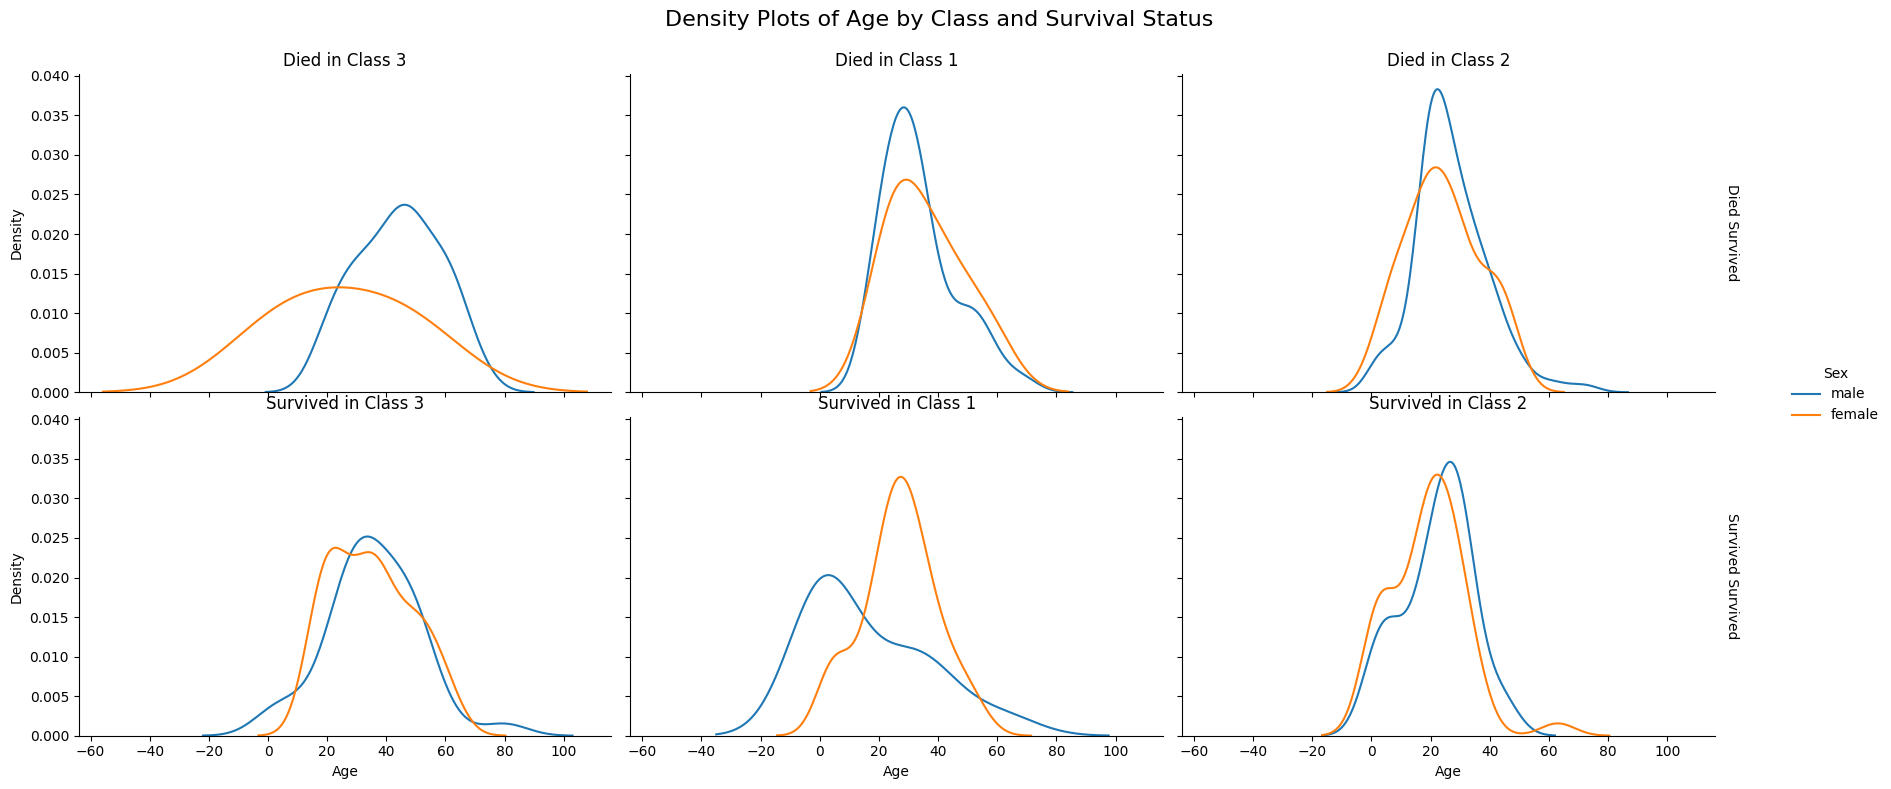

In [ ]:
g = sns.FacetGrid(titanic, col='Pclass', row='Survived', hue='Sex', margin_titles=True, height=4, aspect=1.5, col_order = ["1", "2", "3"])
# Map the density plot onto the grid
g.map(sns.kdeplot, 'Age', common_norm=False)

# Add legends and titles
g.add_legend()
g.set_axis_labels('Age', 'Density')
g.set_titles(col_template='{col_name}', row_template='{row_name} Survived')

# Adjust layout and show the plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Density Plots of Age by Class and Survival Status', fontsize=16)

#you can uncomment below when you come up with your density plots for each class-survived combination
titles = ['Died in Class 3','Died in Class 1', 'Died in Class 2', 'Survived in Class 3','Survived in Class 1', 'Survived in Class 2']
for ax,title in zip(g.axes.flatten(),titles):
    ax.set_title(title)